In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Pecan.txt", delimiter="\t")

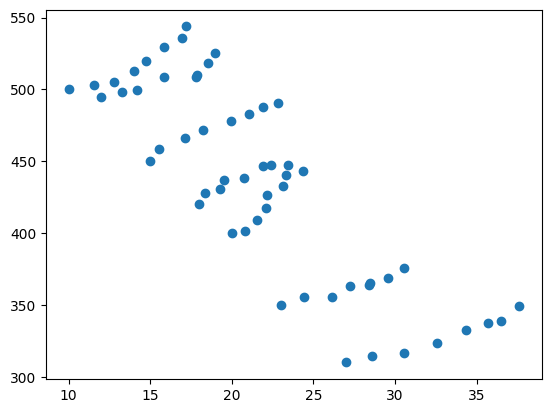

In [3]:
plt.scatter(df['Salinity level'], df['Pecan Yield'])

In [4]:
# Remove the Row ID column
data = df.drop(columns=['Row ID'])

In [5]:
# Define input (features) and output (target)
X = data.drop(columns=['Pecan Yield']).values
y = data['Pecan Yield'].values

In [6]:
# pip install torch scikit-learn
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset

In [7]:
# Split the data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




In [9]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(
    X_train, dtype=torch.float32)

y_train_tensor = torch.tensor(
    y_train, dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(
    X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(
    y_test, dtype=torch.float32).view(-1, 1)

In [10]:
# Create DataLoader for batching
train_dataset = TensorDataset(
    X_train_tensor, y_train_tensor)
train_loader = DataLoader(
    train_dataset, batch_size=16, shuffle=True)

In [11]:
X_train.shape[1]

3

In [12]:
# Define the neural network model

class NeuralNetwork(nn.Module):
    def __init__(self): # Constructor
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 32)
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):        
        x = self.fc1(x)
        x=torch.relu(x)
        x = self.fc2(x)
        x=torch.relu(x)
        x = self.fc3(x)  # Output layer    
        return x

In [13]:
class NeuralNetwork2(nn.Module):
    def __init__(self): # Constructor
        super(NeuralNetwork2, self).__init__()
        self.architecture=nn.Sequential(
            nn.Linear(X_train.shape[1], 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )
    def forward(self, x):
        x=self.architecture(x)
        return x


In [14]:
# Initialize the model, loss function, and optimizer
model = NeuralNetwork2()
criterion = nn.L1Loss() # for mean absoluste loss
# criterion = nn.MSELoss()
optimizer = optim.Adam(
    model.parameters(), lr=0.01)



In [15]:
# Training loop
epochs = 200
for epoch in range(epochs):

    model.train()
    total_loss = 0  # Initialize total loss for the epoch

    for batch_X, batch_y in train_loader:

        optimizer.zero_grad()
        predictions = model(batch_X)

        loss = criterion(predictions, batch_y)

        loss.backward()
        
        optimizer.step()

        total_loss += loss.item()  # Accumulate the loss for each batch

    average_loss = total_loss / len(train_loader)  # Compute the average loss for the epoch    
    print(f'Epoch {epoch+1}/{epochs}, Average Loss: {average_loss:.4f}')


Epoch 1/200, Average Loss: 436.6347
Epoch 2/200, Average Loss: 437.5601
Epoch 3/200, Average Loss: 435.2796
Epoch 4/200, Average Loss: 433.5073
Epoch 5/200, Average Loss: 427.5997
Epoch 6/200, Average Loss: 423.4014
Epoch 7/200, Average Loss: 412.4269
Epoch 8/200, Average Loss: 404.9354
Epoch 9/200, Average Loss: 391.9583
Epoch 10/200, Average Loss: 370.4284
Epoch 11/200, Average Loss: 348.4783
Epoch 12/200, Average Loss: 316.5712
Epoch 13/200, Average Loss: 273.8163
Epoch 14/200, Average Loss: 225.5536
Epoch 15/200, Average Loss: 177.7833
Epoch 16/200, Average Loss: 126.4505
Epoch 17/200, Average Loss: 111.2069
Epoch 18/200, Average Loss: 129.0716
Epoch 19/200, Average Loss: 128.7673
Epoch 20/200, Average Loss: 122.5974
Epoch 21/200, Average Loss: 108.7502
Epoch 22/200, Average Loss: 91.1110
Epoch 23/200, Average Loss: 90.7699
Epoch 24/200, Average Loss: 84.1976
Epoch 25/200, Average Loss: 80.0078
Epoch 26/200, Average Loss: 71.7059
Epoch 27/200, Average Loss: 68.9471
Epoch 28/200, Av

In [16]:

model.eval()

with torch.no_grad():
    test_predictions = model(X_test_tensor)
    test_loss = criterion(
        test_predictions, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

Test Loss: 4.4444


In [17]:
[test_predictions, y_test_tensor]

[tensor([[432.3608],
         [504.6989],
         [315.9478],
         [493.2118],
         [484.0643],
         [476.5040],
         [427.9778],
         [530.5450],
         [313.8345],
         [362.4818],
         [347.7787],
         [407.8103]]),
 tensor([[430.4150],
         [500.0000],
         [316.7512],
         [490.2917],
         [487.6102],
         [477.7354],
         [420.0000],
         [535.8058],
         [314.3954],
         [365.5778],
         [350.0000],
         [426.8807]])]

In [18]:
# Print weights and biases for each layer in the model
def print_weights_and_biases(model):
    for name, param in model.named_parameters():
        if param.requires_grad:
            print(f"Layer: {name}")
            print(f"Values:\n{param.data}\n")

In [19]:
# Call the function to print weights and biases
print_weights_and_biases(model)

Layer: architecture.0.weight
Values:
tensor([[ 0.6395, -0.1559, -0.3173],
        [ 0.4803, -0.3384,  0.0172],
        [-0.1856, -0.7407,  0.1502],
        [-0.0946,  0.3774,  0.2287],
        [ 0.6481,  0.2668,  0.0508],
        [ 0.2245, -0.5593,  0.0544],
        [ 0.5894, -0.1561, -0.0271],
        [-0.0228,  0.6499,  0.0611],
        [ 0.3157,  0.3362,  0.4082],
        [ 0.3397, -0.2157,  0.2822],
        [-0.0521, -0.3957, -0.3049],
        [-0.1910, -0.1263, -0.4925],
        [ 0.0632,  0.1868,  0.3984],
        [ 0.1499, -0.4844, -0.1011],
        [ 0.5717, -0.2770,  0.1730],
        [ 0.2432,  0.0573, -0.5822],
        [-0.6204,  0.0244, -0.1243],
        [-0.0740,  0.0660,  0.1061],
        [ 0.0230,  0.6067,  0.6655],
        [ 0.0777,  0.0628, -0.1876],
        [-0.0547, -0.3713,  0.0699],
        [-0.5774,  0.1809, -0.4490],
        [-0.6641,  0.1896, -0.1643],
        [-0.5213, -0.0918, -0.1500],
        [ 0.4914,  0.1941,  0.1873],
        [-0.1311, -0.0365, -0.2804],
 

In [20]:
myData = [[90, 12, 52],
          [83, 15, 50],
          [100, 2, 90]]

myData_transformed = scaler.transform(myData)

myData_tensor= torch.tensor(
    myData_transformed, dtype=torch.float32)


In [21]:
model.eval()
with torch.no_grad():
    predictions = model(myData_tensor)


In [22]:
predictions

tensor([[489.8164],
        [466.1120],
        [641.5770]])

In [23]:
myData

[[90, 12, 52], [83, 15, 50], [100, 2, 90]]

In [24]:
myData_transformed

array([[ 0.53314162, -1.42914842,  0.42526729],
       [ 0.18871365, -0.98567586,  0.22595528],
       [ 1.02518157, -2.90739028,  4.21219547]])